# Extracting Wikipedia data

Now I've got my hand onto the API and I know I can loop it, so I'm going to extract the data and save it as a proper date-time-formatted dataframe. I will save the most seen 1000 articles per day... 

In [17]:
# first...

import requests
import json
import pandas as pd
from datetime import datetime

#initialize dataframe for simplicity
maindf = pd.DataFrame()
response = requests.get('https://wikimedia.org/api/rest_v1/metrics/pageviews/top/en.wikipedia/all-access/2015/12/31')
datetime_object = datetime.strptime('2015/12/31','%Y/%m/%d')
maindf = pd.DataFrame(json.loads(response.content.decode('utf-8'))['items'][0]['articles'])

#df = pd.DataFrame(list(data.items()), columns=['Date', 'DateValue'])
#df['Date'] = pd.to_datetime(df['Date'])



In [18]:
maindf = maindf.set_index('article')
print(maindf.head(10))
viewsdf=pd.DataFrame()
ranksdf=pd.DataFrame()
viewsdf['2015/12/31'] = maindf['views']
ranksdf['2015/12/31'] = maindf['rank']

                                               rank     views
article                                                      
Main_Page                                         1  16839014
Special:Export/                                   2   3630692
Special:Search                                    3   1704369
Special:Book                                      4    407340
Star_Wars:_The_Force_Awakens                      5    386649
Ethan_Couch                                       6    208390
Star_Wars                                         7    207870
New_Year's_Eve                                    8    186715
List_of_stock_market_crashes_and_bear_markets     9    179200
Steven_Avery                                     10    166410


I want to keep on completeing this and then transpose it to have the times as rows and be able to plot the time evolution for each article, calculate increase wrt the previous day, etc.

In [1]:
import requests
import json
import pandas as pd

#initialize dataframe for simplicity
maindf = pd.DataFrame()
response = requests.get('https://wikimedia.org/api/rest_v1/metrics/pageviews/top/en.wikipedia/all-access/2015/12/31')
maindf = pd.DataFrame(json.loads(response.content.decode('utf-8'))['items'][0]['articles'])
maindf = maindf.set_index('article')
viewsdf=pd.DataFrame()
ranksdf=pd.DataFrame()
viewsdf['2015/12/31'] = maindf['views']
ranksdf['2015/12/31'] = maindf['rank']

# iterate
mainreq = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/top/en.wikipedia/all-access/'
for year in ['2016']:
    for month in range(1,4): # typically to 13
        if month in [1,3,5,7,8,10,12]:
            # there's 31 days
            for day in range(1,32):
                # get request and do the things
                
                response = requests.get(mainreq+str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                if not (response.status_code==200):
                    print('Oops something went wrong for ' + str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                dftemp = pd.DataFrame(json.loads(response.content.decode('utf-8'))['items'][0]['articles'])
                # change a couple of things for the merging...
                dftemp = dftemp.set_index('article')
                dftemp = dftemp.rename(columns={'views': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                viewsdf = viewsdf.join(dftemp.drop(columns=['rank']), how='outer')
                dftemp = dftemp.drop(columns=[str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')])
                dftemp = dftemp.rename(columns={'rank': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                ranksdf = ranksdf.join(dftemp, how='outer')
        if month in [4,6,9,11]:
            # there's 30 days
            for day in range(1,31):
                # get request and do the things
                response = requests.get(mainreq+str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                if not (response.status_code==200):
                    print('Oops something went wrong for ' + str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                dftemp = pd.DataFrame(json.loads(response.content.decode('utf-8'))['items'][0]['articles'])
                # change a couple of things for the merging...
                dftemp = dftemp.set_index('article')
                dftemp = dftemp.rename(columns={'views': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                viewsdf = viewsdf.join(dftemp.drop(columns=['rank']), how='outer')
                dftemp = dftemp.drop(columns=[str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')])
                dftemp = dftemp.rename(columns={'rank': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                ranksdf = ranksdf.join(dftemp, how='outer')
        if month == 2:
            # there's 28 days
            for day in range(1,29):
                # get request and do the things
                response = requests.get(mainreq+str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                if not (response.status_code==200):
                    print('Oops something went wrong for ' + str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0'))
                dftemp = pd.DataFrame(json.loads(response.content.decode('utf-8'))['items'][0]['articles'])
                # change a couple of things for the merging...
                dftemp = dftemp.set_index('article')
                dftemp = dftemp.rename(columns={'views': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                viewsdf = viewsdf.join(dftemp.drop(columns=['rank']), how='outer')
                dftemp = dftemp.drop(columns=[str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')])
                dftemp = dftemp.rename(columns={'rank': str(year)+'/'+str(month).rjust(2, '0')+'/'+str(day).rjust(2, '0')})
                ranksdf = ranksdf.join(dftemp, how='outer')
        # now maindf should have the data with the right labels and all...
        print('Month '+str(month).rjust(2, '0')+' done')       


Month 01 done
Month 02 done
Month 03 done


In [4]:
viewsdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12848 entries, "Heroes"_(David_Bowie_album) to ﺹ
Data columns (total 91 columns):
2015/12/31    1000 non-null float64
2016/01/01    1000 non-null float64
2016/01/02    1000 non-null float64
2016/01/03    999 non-null float64
2016/01/04    1000 non-null float64
2016/01/05    1000 non-null float64
2016/01/06    1000 non-null float64
2016/01/07    1000 non-null float64
2016/01/08    1000 non-null float64
2016/01/09    999 non-null float64
2016/01/10    1000 non-null float64
2016/01/11    1000 non-null float64
2016/01/12    999 non-null float64
2016/01/13    1000 non-null float64
2016/01/14    1000 non-null float64
2016/01/15    1000 non-null float64
2016/01/16    1000 non-null float64
2016/01/17    1000 non-null float64
2016/01/18    1000 non-null float64
2016/01/19    1000 non-null float64
2016/01/20    1000 non-null float64
2016/01/21    1000 non-null float64
2016/01/22    1000 non-null float64
2016/01/23    1000 non-null float64
2016/01/24  

In [5]:
ranksdf.describe()

In [2]:
viewsdf.head(25)

Now, let's try to plot something, but first I want to use the transpose and parse dates for the indices. Then, let's say we pick '11.22.63' and see the evolution of the views using seaborn. After that, I want to pick the top 20 for each date and plot all, ignoring 'main page' (btw who tf opens wikipedia main page?)

In [3]:
vewsdates = viewsdf.T
vewsdates.index = pd.to_datetime(vewsdates.index)


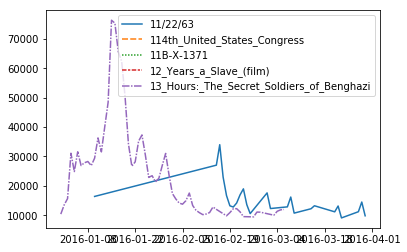

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=vewsdates.iloc[:,15:20])
plt.show()

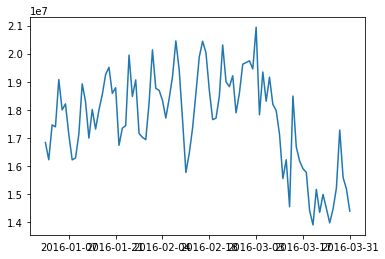

In [15]:
sns.lineplot(data=vewsdates['Main_Page'])
plt.show()

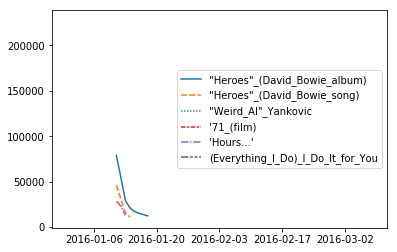

In [18]:
sns.lineplot(data=vewsdates.iloc[:,0:6])
plt.show()

Noice!, Let's try to find the increases and plot them!

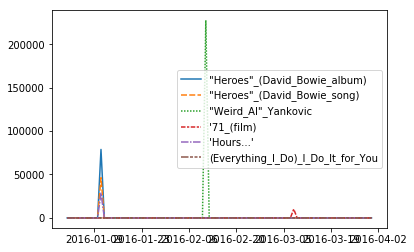

In [20]:
vdch = vewsdates.fillna(1).pct_change()

sns.lineplot(data=vdch.iloc[:,0:6])
plt.show()

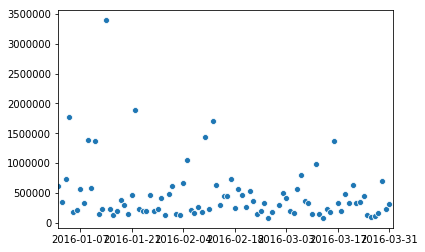

In [30]:
# to find the column that has the max, use df.idxmax(axis=1)
# to find the maxvalue, use df.max(axis=1)
vdch = vewsdates.fillna(1).pct_change()
vdch['MaxPctChange']=vdch.max(axis=1)
vdch['Art_maxpctch']=vdch.idxmax(axis=1)

sns.scatterplot(data=vdch['MaxPctChange'], hue=vdch['Art_maxpctch'])
plt.xlim(['2016/01','2016/04'])
plt.show()

vdch[['MaxPctChange','Art_maxpctch']].head(20)

Clearly the top is now enough, I want to select the views above 75% of the greatest increase... or something like that
That will probably define peaks better.

Otherwise I could find the peakest peak for every column and plot it overlapping... I like that idea too!

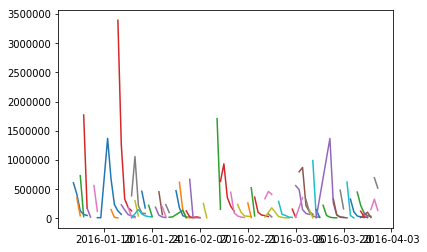

Peak order
2015-12-31                                                  NaN
2016-01-01                                         Natalie_Cole
2016-01-02                            Lady_Mary_Wortley_Montagu
2016-01-03                     María_Santos_Gorrostieta_Salazar
2016-01-04                      Nuclear_program_of_Saudi_Arabia
2016-01-05                         List_of_aviators_by_nickname
2016-01-06                                             Kangaroo
2016-01-07                                               Bikini
2016-01-08                                  Chichijima_incident
2016-01-09                                          George_Raft
2016-01-10                      Supersonic_Low_Altitude_Missile
2016-01-11                                         Iman_(model)
2016-01-12                                        Derrick_Henry
2016-01-13                                       Shetland_sheep
2016-01-14                                         Alan_Rickman
2016-01-15                   

In [75]:
leglist = []
for rowidx in range(1,vdch['MaxPctChange'].size):
    # ignore the first one because is a nan
    colname = vdch.iloc[rowidx]['Art_maxpctch']
    valstopl = vewsdates.iloc[max(rowidx-5,0):min(rowidx+5,vdch['MaxPctChange'].size-1)][colname].dropna()
    sns.lineplot(data=valstopl)
    if rowidx%10==0:
        leglist.append(colname)
#
#plt.yscale('log')
#plt.legend(leglist)
plt.show()

print('Peak order')
print(vdch.iloc[:]['Art_maxpctch'])

For simplicity, can we crop the peaks with only more than 500.000 views? OF course we can!

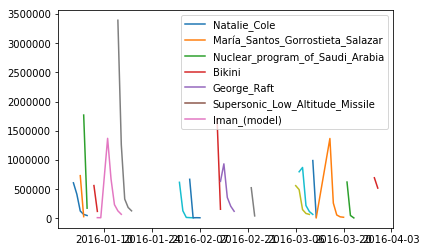

Peak order
['Natalie_Cole', 'María_Santos_Gorrostieta_Salazar', 'Nuclear_program_of_Saudi_Arabia', 'Bikini', 'George_Raft', 'Supersonic_Low_Altitude_Missile', 'Iman_(model)', 'Alan_Rickman', 'Xerostomia', 'Frederick_Douglass', 'Pride_and_Prejudice', 'Warzone_2100', 'Christopher_Paul_Neil', 'Omayra_Sánchez', 'Antonin_Scalia', 'Nicole,_Erica_and_Jaclyn_Dahm', 'Anaximander', 'Pierre_Brassau', 'Nancy_Reagan', 'Meldonium', 'Lupe_Fuentes', 'Merrick_Garland', 'Bluetooth', 'Patty_Duke']


In [84]:
leglist = []
threshold = 500000
for rowidx in range(1,vdch['MaxPctChange'].size):
    # ignore the first one because is a nan
    
    colname = vdch.iloc[rowidx]['Art_maxpctch']
    if vewsdates.iloc[rowidx][colname] >= threshold:
        valstopl = vewsdates.iloc[max(rowidx-5,0):min(rowidx+5,vdch['MaxPctChange'].size-1)][colname].dropna()
        sns.lineplot(data=valstopl)
        leglist.append(colname)
            
        
#
#plt.yscale('log')
plt.legend(leglist[0:7])
plt.show()

print('Peak order')
#print(vdch.iloc[:]['Art_maxpctch'])
print(leglist)

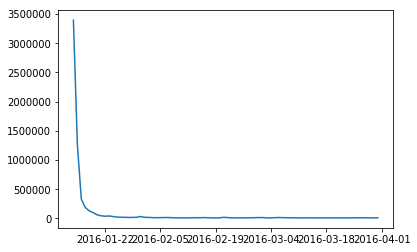

Alan Rickman passed away on Jan 14th, 2016. We capture that event here


In [86]:
sns.lineplot(data=vewsdates['Alan_Rickman'])
plt.show()
print('Alan Rickman passed away on Jan 14th, 2016. We capture that event here')

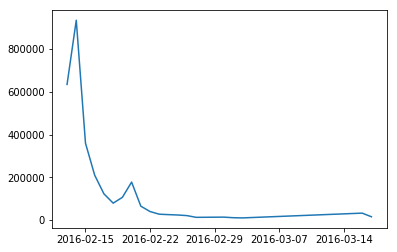

Supreme Court Justice Antonin Scalia passed away on Feb 13th, 2016. We capture that event here as well


In [87]:
sns.lineplot(data=vewsdates['Antonin_Scalia'])
plt.show()
print('Supreme Court Justice Antonin Scalia passed away on Feb 13th, 2016. We capture that event here as well')

Cool!! Here's the idea now: to correlate these articles with news events, I need to find the news articles that are 'closer' to each title/wiki article, then pull out the dates... no?

In addition, we can also see what topics draw attention to wikipedia (probably politics doesn't, deaths seem to do...)